In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
from PIL import Image

# Load the Saved Model

In [2]:
MODEL_PATH = "models/resnet_model"
model = keras.models.load_model(MODEL_PATH)
model.summary()

2023-02-14 21:17:49.990923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-14 21:17:50.058715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-14 21:17:50.058775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-14 21:17:50.059700: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                             

# Predict Examples

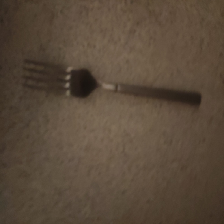

In [3]:
# 8842 Fork
img = load_img('images/8842.jpg', target_size=(224, 224))
x = np.array(img)
X = np.array([x])

img = Image.fromarray(x, 'RGB')
img.show()

In [4]:
pred = model.predict(X)
pred

2023-02-14 21:18:06.073953: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100
2023-02-14 21:18:07.648746: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-14 21:18:07.756234: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-14 21:18:07.756302: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-02-14 21:18:07.851002: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-14 21:18:07.851110: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-02-14 21:18:09.449452: W tensorflow/core/common_runtime/bf

array([[1.7703541e-06, 9.9679357e-01, 2.8296196e-04, 3.0808579e-04,
        3.5544529e-06, 2.6100753e-03]], dtype=float32)

In [5]:
classes = [
    'cup',
    'fork',
    'glass',
    'knife',
    'plate',
    'spoon']
classes

['cup', 'fork', 'glass', 'knife', 'plate', 'spoon']

In [6]:
dict(zip(classes, pred[0]))

{'cup': 1.7703541e-06,
 'fork': 0.99679357,
 'glass': 0.00028296196,
 'knife': 0.0003080858,
 'plate': 3.5544529e-06,
 'spoon': 0.0026100753}

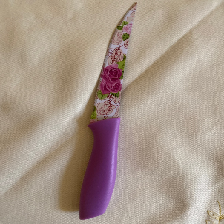

In [7]:
# 5900 knife
img = load_img('images/5900.jpg', target_size=(224, 224))
x = np.array(img)
X = np.array([x])

img = Image.fromarray(x, 'RGB')
img.show()

In [8]:
pred = model.predict(X)
pred

array([[2.1961623e-06, 3.8237244e-04, 1.7828147e-04, 9.9912292e-01,
        2.5465788e-05, 2.8871806e-04]], dtype=float32)

In [9]:
dict(zip(classes, pred[0]))

{'cup': 2.1961623e-06,
 'fork': 0.00038237244,
 'glass': 0.00017828147,
 'knife': 0.9991229,
 'plate': 2.5465788e-05,
 'spoon': 0.00028871806}

# Convert Keras(TF) to TF-Lite

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('kitchenware-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

2023-02-14 21:18:18.279523: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp235r0_j5/assets


2023-02-14 21:18:51.584061: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2023-02-14 21:18:51.584107: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2023-02-14 21:18:51.585128: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp235r0_j5
2023-02-14 21:18:51.630910: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2023-02-14 21:18:51.631030: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /tmp/tmp235r0_j5
2023-02-14 21:18:51.931536: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2023-02-14 21:18:52.785967: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /tmp/tmp235r0_j5
2023-02-14 21:18:53.233487: I tensorflow/cc/saved_model/loader.cc:283] SavedModel load for tags { serve }; Status: success: OK. Took 164837

In [11]:
!ls -lh

/bin/bash: /home/ekizo/miniconda3/envs/ml-zoomcamp/lib/libtinfo.so.6: no version information available (required by /bin/bash)
total 119M
-rwxrwxrwx 1 ekizo ekizo 2.1M Feb 14 21:17 converting_to_tflite-Copy1.ipynb
-rwxrwxrwx 1 ekizo ekizo 2.1M Feb 14 21:13 converting_to_tflite.ipynb
drwxrwxrwx 1 ekizo ekizo 4.0K Jan 31 22:45 dataset
drwxrwxrwx 1 ekizo ekizo 4.0K Feb 14 19:54 images
-rwxrwxrwx 1 ekizo ekizo 130K Feb 14 20:39 kitchenware-classification-resnet50-80-train.ipynb
-rwxrwxrwx 1 ekizo ekizo 115M Feb 14 21:18 kitchenware-model.tflite
-rwxrwxrwx 1 ekizo ekizo    0 Feb 14 21:01 lambda_function.py
drwxrwxrwx 1 ekizo ekizo 4.0K Feb 14 21:13 models


In [12]:
assert False

AssertionError: 

Kernel is restarted.

# TFLite Interpretation

In [1]:
# !pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

In [2]:
# import tensorflow.lite as tflite  
import tflite_runtime.interpreter as tflite

In [3]:
interpreter = tflite.Interpreter(model_path='kitchenware-model.tflite')
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
interpreter.get_input_details()

[{'name': 'serving_default_input_2:0',
  'index': 0,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([ -1, 224, 224,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [5]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 194,
  'shape': array([1, 6], dtype=int32),
  'shape_signature': array([-1,  6], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [6]:
interpreter = tflite.Interpreter(model_path='kitchenware-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

## Preprocessing Layer

In [7]:
from keras_image_helper import create_preprocessor
from PIL import Image
import numpy as np

In [8]:
preprocessor = create_preprocessor('resnet50', target_size=(224, 224))

In [9]:
classes = [
    'cup',
    'fork',
    'glass',
    'knife',
    'plate',
    'spoon']
classes

['cup', 'fork', 'glass', 'knife', 'plate', 'spoon']

## Example Predictions with TFLite

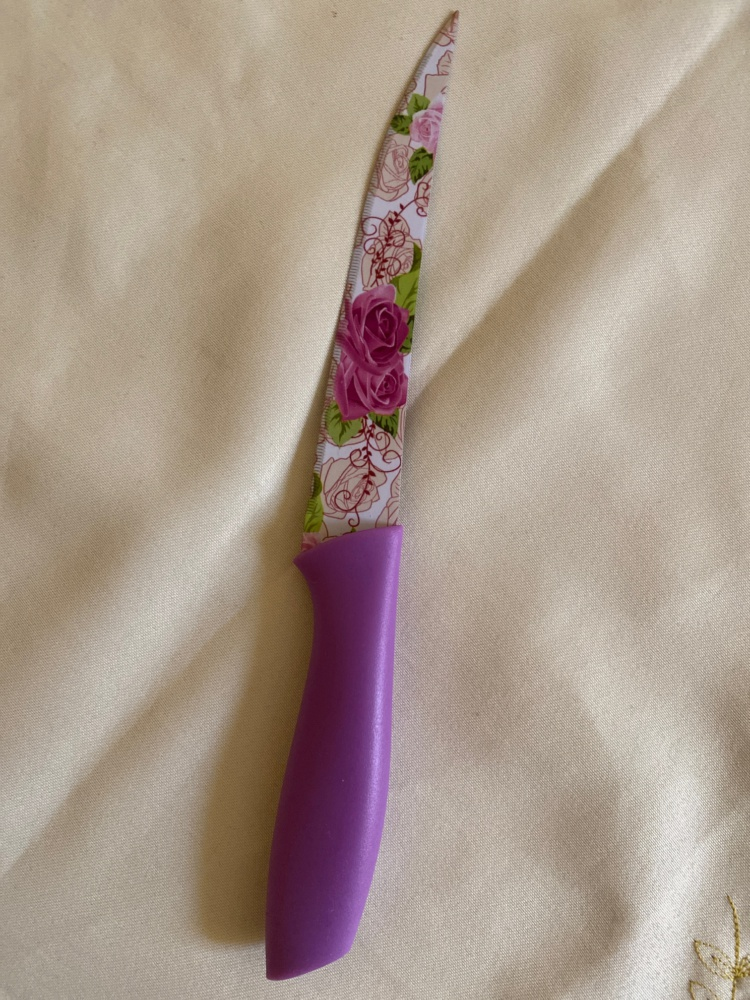

In [10]:
IMG_PATH = "images/5900.jpg"
img = Image.open(IMG_PATH)
x = np.array(img)

img = Image.fromarray(x, 'RGB')
img.show()

In [11]:
X = preprocessor.from_path(IMG_PATH)

In [12]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [13]:
dict(zip(classes, preds[0]))

{'cup': 1.0425451e-05,
 'fork': 0.0013583167,
 'glass': 0.0028298835,
 'knife': 0.9949882,
 'plate': 1.5709416e-05,
 'spoon': 0.0007974656}

### Example 2

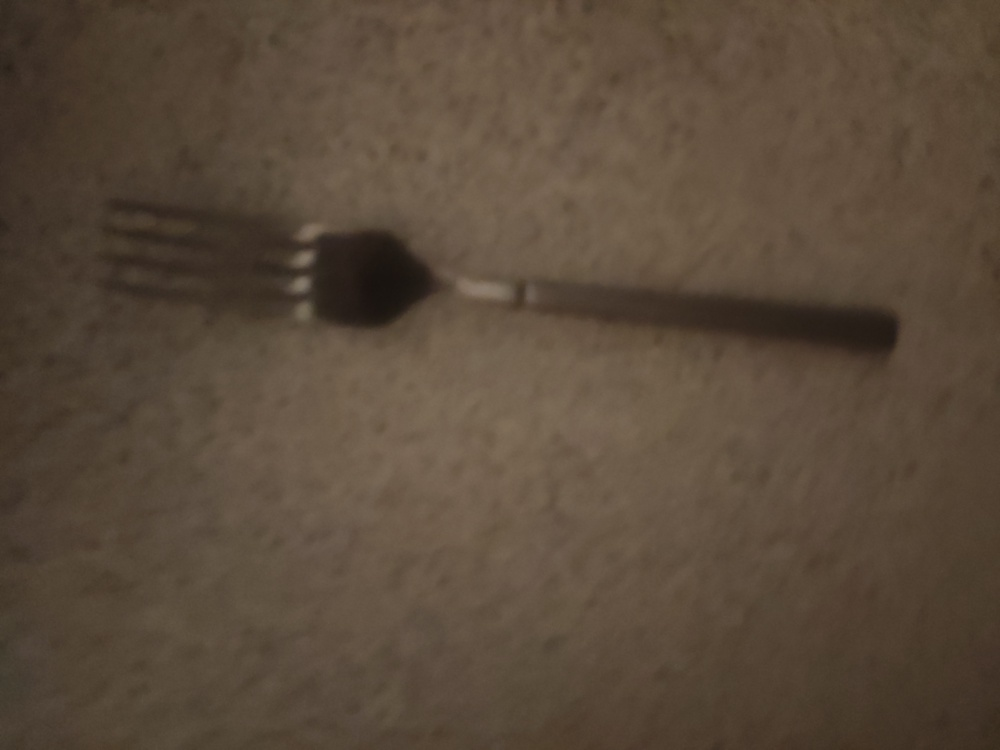

In [14]:
# 8842 fork
IMG_PATH = "images/8842.jpg"
img = Image.open(IMG_PATH)
x = np.array(img)

img = Image.fromarray(x, 'RGB')
img.show()

In [15]:
X = preprocessor.from_path(IMG_PATH)

interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

dict(zip(classes, preds[0]))

{'cup': 0.00017136408,
 'fork': 0.93218094,
 'glass': 0.0016588105,
 'knife': 0.025757259,
 'plate': 7.627483e-05,
 'spoon': 0.04015533}

There are some prediction result differences for two same pictures between TFLite model and Keras model.